In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null data available in the data set. 

## Training and Testing Data split

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(584, 16)
(146, 16)


## Analysis


In [11]:
(df_train.casual + df_train.registered - df_train.cnt).sort_values()

367    0
657    0
573    0
398    0
542    0
      ..
20     0
567    0
673    0
624    0
520    0
Length: 584, dtype: int64

The total count (cnt) of customers is the sum of 'casual' and 'registered'. Hence, these features can not be used to predict the total count. Instead, we could find unique charactericts of category of customers.

In [13]:
df_train[['workingday','holiday', 'weekday']]

,workingday,holiday,weekday
367,1,0,2
648,1,0,4
44,1,0,1
705,1,0,5
379,0,0,0
...,...,...,...
578,1,0,4
53,1,0,3
350,0,0,6
79,1,0,1


There is no clear releation between `workingday`, `holiday`, and `weekday`. Hence we keep these features

'dteday' feature is redundant as 'yr', and 'month' covers most of the data from this. Only day component is missing, but as this too granular and we don't have enough data available to make t

'instant' is an just an ID and it won't add any value to the analysis. 

In [17]:
# Remove unnecessary Features
unnecessary_cols = ['instant', 'dteday', 'casual', 'registered']
df_train.drop(columns=unnecessary_cols, axis=1, inplace=True)
df_test.drop(columns=unnecessary_cols, axis=1, inplace=True)

In [18]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

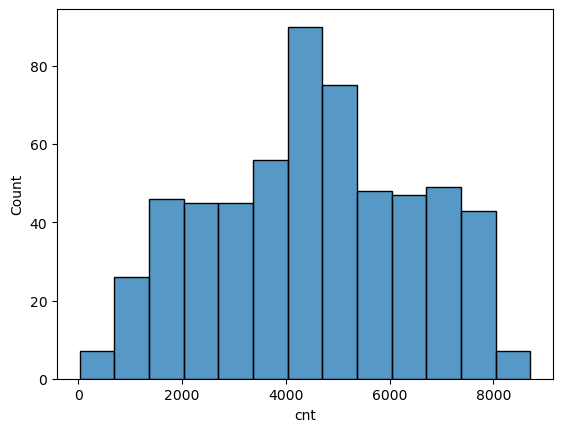

In [19]:
sns.histplot(df_train['cnt'])
plt.show()

In [20]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed']

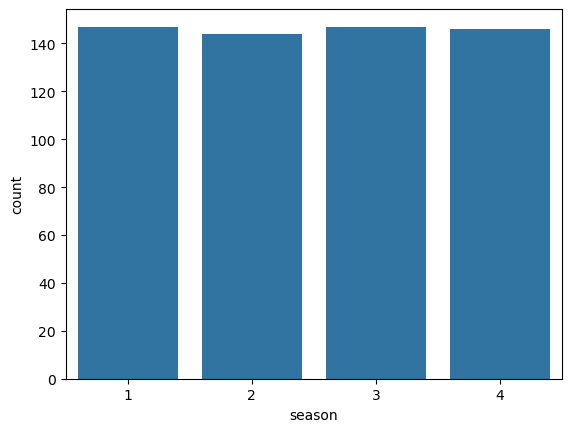

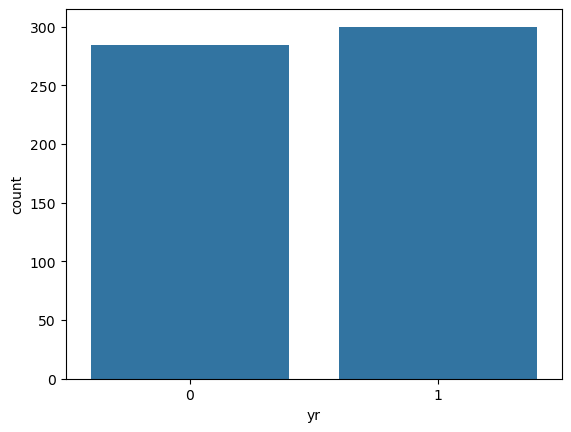

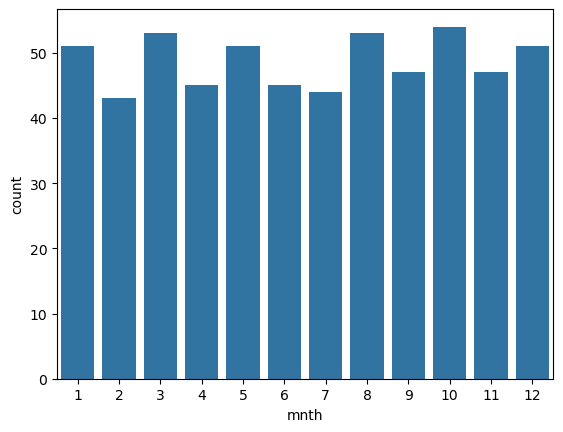

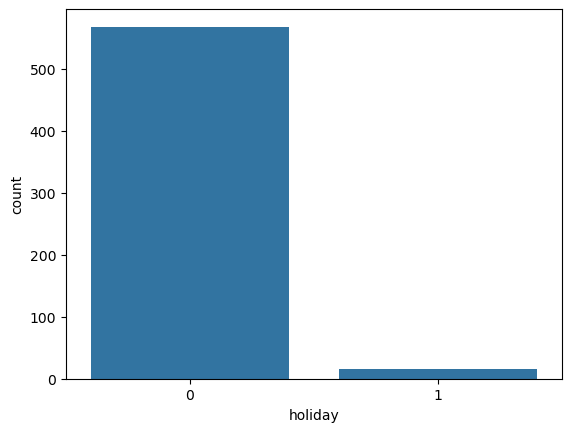

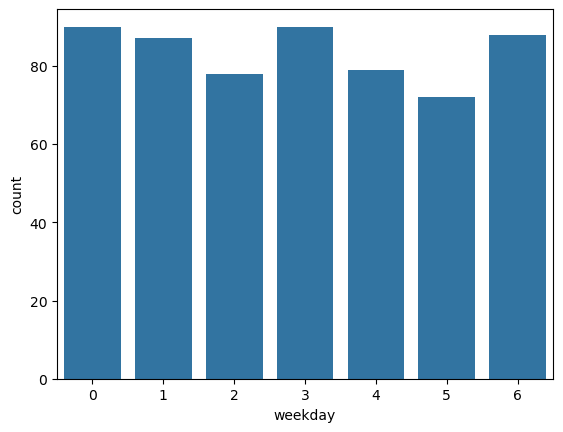

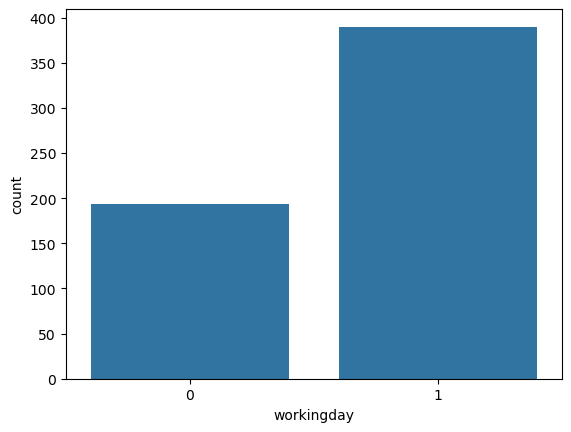

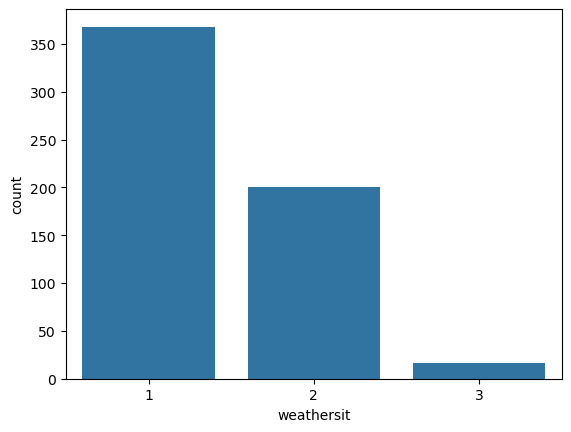

In [21]:
for col in cat_cols:
    sns.barplot(df_train[col].value_counts())
    plt.show()

Based on the above graphs, the following are a few observations
- Holidays are bad for business
- Generally, on working days, we see an increase in rentals
- Business is low on Weekends (weekdays = 4,5)
- On clear weather, we have a reasonable business. Rain, snow, or mist affects our business
- It seems like seasons only have a very minor impact on business.
- There is a slight decrease in year-to-year customer counts.

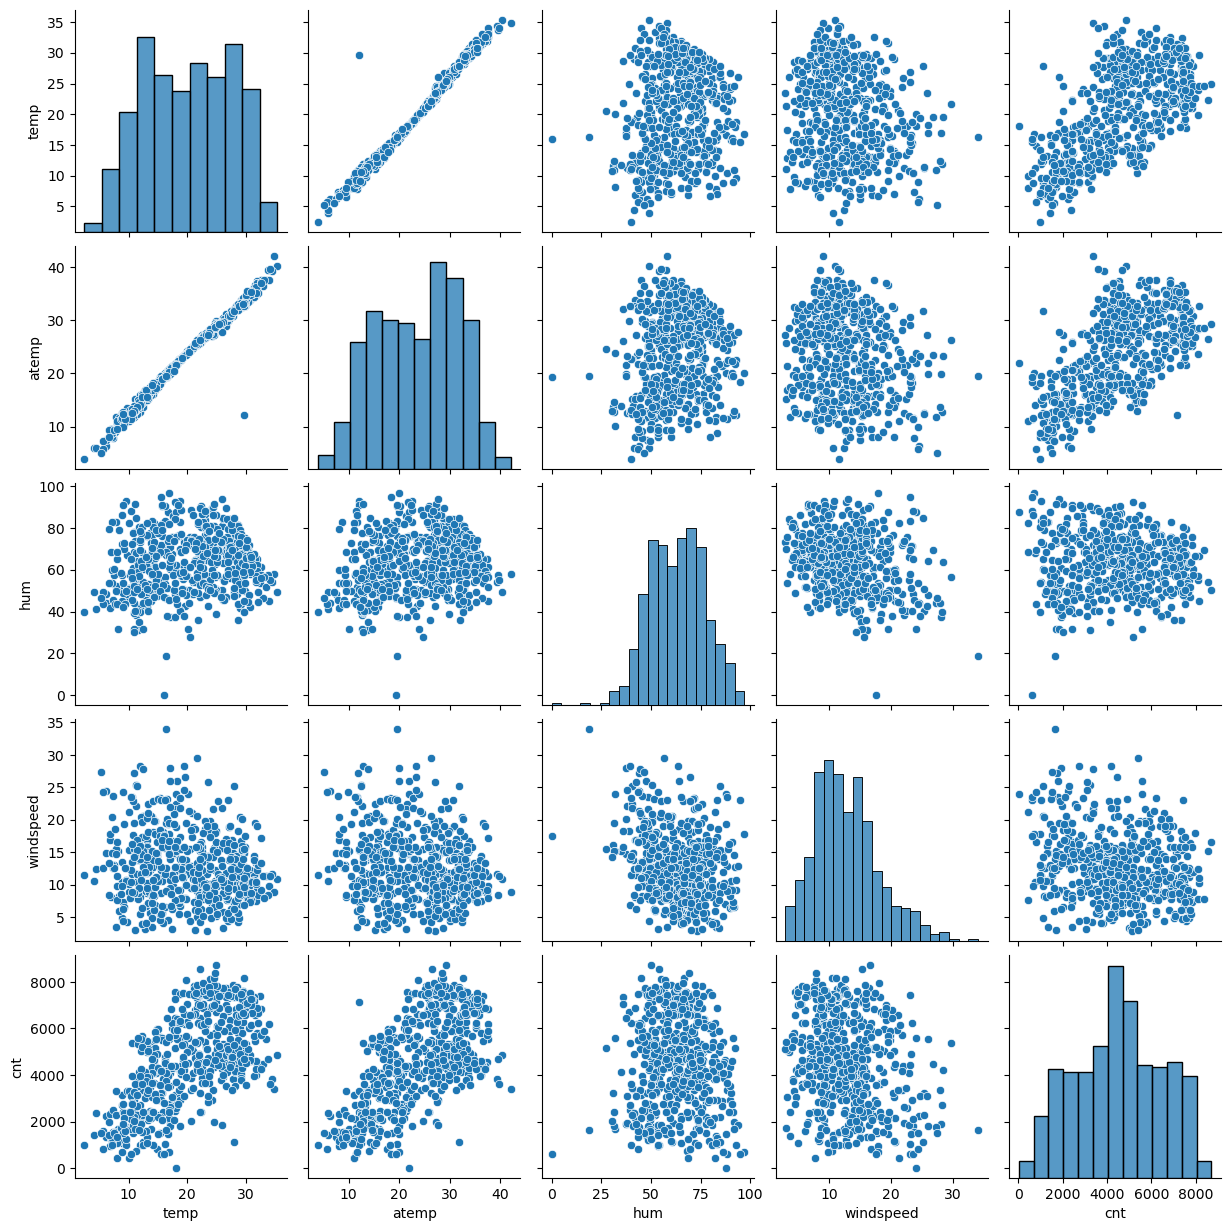

In [23]:
sns.pairplot(df_train[num_cols+['cnt']])
plt.show()

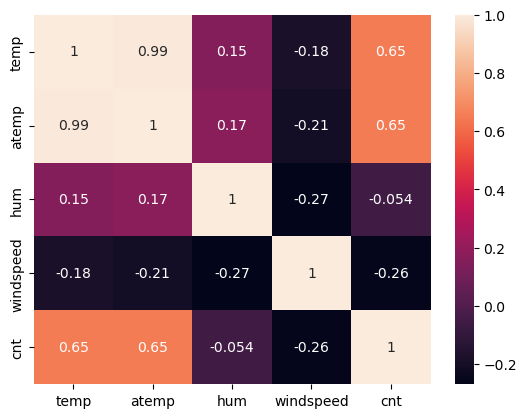

In [24]:
sns.heatmap(df_train[num_cols+['cnt']].corr(), annot=True)
plt.show()

Correlation of `hum` and `cnt` is near zero. Also, by looking at the ScatterPlot, we can be sure that, `hum` can be ignored for the analysis.

There is very high correlation between `temp` and `atemp`, which will cause multi-colinearity. We have to drop one of them. To decide which one to drop, we need to look at the R-squared value of both. Hence, for now, we keep it, and later we remove one of it

In [26]:
# dropping `hum`
df_train.drop(columns='hum', axis=1, inplace=True)
df_test.drop(columns='hum', axis=1, inplace=True)

num_cols.remove('hum')

In [27]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,cnt
367,1,1,1,0,2,1,1,6.150000,6.31375,24.499957,2236
648,4,1,10,0,4,1,1,17.835000,21.55835,12.166932,7570
44,1,0,2,0,1,1,1,17.015000,19.91750,27.999836,1913
705,4,1,12,0,5,1,2,13.154153,16.09790,8.750200,5008
379,1,1,1,0,0,0,1,6.833347,8.08125,16.834286,2311


### Encoding Categorical Features

In [29]:
from sklearn.preprocessing import OneHotEncoder

encodable_cols = ['season', 'mnth', 'weekday', 'weathersit']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
train_encoded = one_hot_encoder.fit_transform(df_train[encodable_cols])
df_train = pd.concat([df_train, train_encoded], axis=1).drop(columns=encodable_cols)

test_encoded = one_hot_encoder.transform(df_test[encodable_cols])
df_test = pd.concat([df_test, test_encoded], axis=1).drop(columns=encodable_cols)

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
367,1,0,1,6.150000,6.31375,24.499957,2236,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
648,1,0,1,17.835000,21.55835,12.166932,7570,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44,0,0,1,17.015000,19.91750,27.999836,1913,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,1,0,1,13.154153,16.09790,8.750200,5008,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
379,1,0,0,6.833347,8.08125,16.834286,2311,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_test.head()

,yr,holiday,workingday,temp,atemp,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,5.459106,6043,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1,0,1,32.082500,36.04875,7.625404,6211,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0,0,1,19.270000,22.85230,13.250121,2659,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0,0,1,31.433347,34.24915,13.417286,4780,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,29.315000,32.19710,19.583229,4968,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


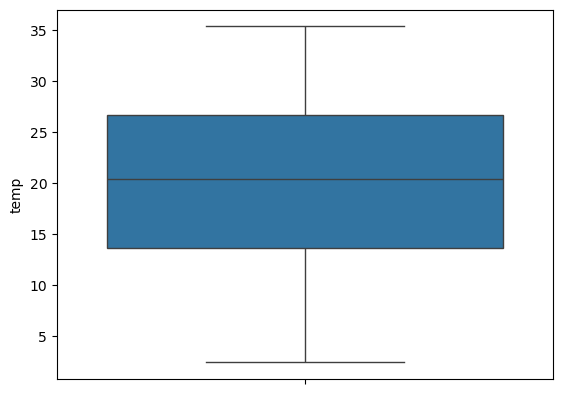

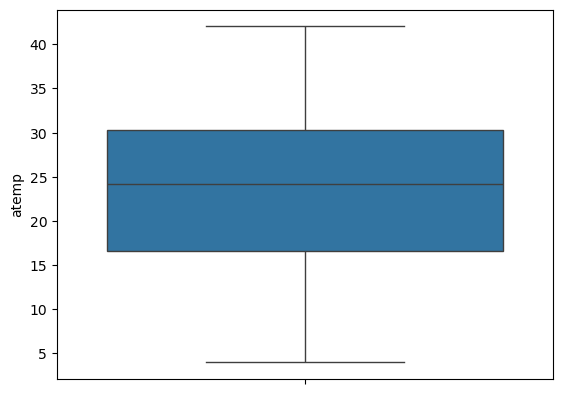

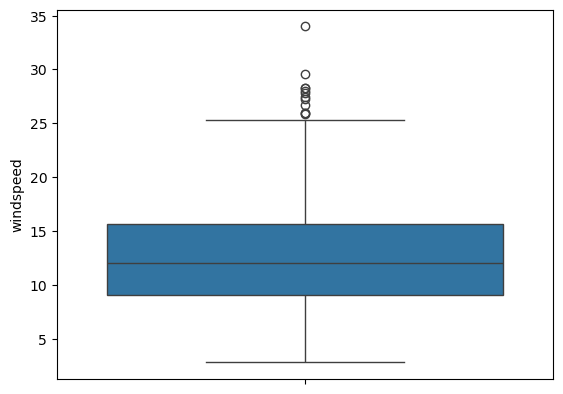

In [32]:
for col in num_cols:
    sns.boxplot(df_train[col])
    plt.show()

In case of `windspeed`, we have some outliers. We can delete those rows

In [34]:
df_train = df_train[df_train.windspeed < 30]

## Scaling

In [36]:
y_train = df_train['cnt']
X_train = df_train.drop(columns=['cnt'])

y_test = df_test['cnt']
X_test = df_test.drop(columns=['cnt'])

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [38]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,windspeed,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,583.000000,583.000000,583.000000,5.830000e+02,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000,583.000000,...,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.514580,0.027444,0.668954,1.188300e-16,2.711763e-16,-2.071908e-16,0.246998,0.252144,0.250429,0.072041,...,0.080617,0.087479,0.149228,0.133791,0.154374,0.135506,0.123499,0.149228,0.343053,0.027444
std,0.500217,0.163514,0.470994,1.000859e+00,1.000859e+00,1.000859e+00,0.431636,0.434616,0.433632,0.258778,...,0.272481,0.282778,0.356619,0.340720,0.361617,0.342557,0.329292,0.356619,0.475137,0.163514
min,0.000000,0.000000,0.000000,-2.386337e+00,-2.425823e+00,-1.920558e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.789526e-01,-8.587050e-01,-7.187615e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,4.287192e-02,8.329239e-02,-1.459847e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.840386e-01,8.391469e-01,5.557565e-01,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.052455e+00,2.299633e+00,3.258494e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=12)

In [42]:
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'season_4', 'mnth_9',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_3'],
      dtype='object')


In [43]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Modeling

We will have following conditions
- p-value should be less that 0.05 for every features
- 'VIF' should be less than 5.0

In [46]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [47]:
model1 = sm.OLS(np.array(y_train), X_train_sm)
reg1 = model1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.96e-181
Time:                        21:40:51   Log-Likelihood:                -4801.3
No. Observations:                 583   AIC:                             9627.
Df Residuals:                     571   BIC:                             9679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3165.1715     82.744     38.252      0.000    3002.651    3327.692
yr            1982.3044     76.876     25.786      0.000    1831.310    2133.298
holiday       -706.8884    210.004     -3.366      0.001   -1119.363    -294.414
workingday     257.1287     72.454      3.549      0.000     114.820     399.437
temp          1222.6182     40.289     30.346      0.000    1143.486    1301.751
season_4      1031.1171     90.688     11.370      0.000     852.995    1209.239
mnth_9         554.1028    143.962      3.849      0.000     271.343     836.863
weekday_1     -199.4746     92.763     -2.150      0.032    -381.673     -17.276
weekday_2     -202.7769    103.600     -1.957      0.051    -406.261       0.707
weekday_3      -25.4582     98.868     -0.257      0.797    -219.648     168.731
weekday_4        1.9989    102.064      0.020      0.984    -198.467     202.465
weekday_5      -24.0488    106.761     -0.225      0.822    -233.741     185.643
weathersit_3 -2441.5934    237.267    -10.290      0.000   -2907.616   -1975.570
==============================================================================
Omnibus:                       41.878   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.474
Skew:                          -0.539   Prob(JB):                     2.72e-14
Kurtosis:                       4.188   Cond. No.                     4.64e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on p-value, we should drop `weekday_4`

In [49]:
X_train_sm.drop(columns=['weekday_4'], axis=1, inplace=True)
X_test_sm.drop(columns=['weekday_4'], axis=1, inplace=True)

Generating the model again

In [51]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
reg2 = model2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     186.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.96e-181
Time:                        21:40:51   Log-Likelihood:                -4801.3
No. Observations:                 583   AIC:                             9627.
Df Residuals:                     571   BIC:                             9679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3165.1715     82.744     38.252      0.000    3002.651    3327.692
yr            1982.3044     76.876     25.786      0.000    1831.310    2133.298
holiday       -704.8895    267.463     -2.635      0.009   -1230.221    -179.558
workingday     259.1276    125.236      2.069      0.039      13.148     505.107
temp          1222.6182     40.289     30.346      0.000    1143.486    1301.751
season_4      1031.1171     90.688     11.370      0.000     852.995    1209.239
mnth_9         554.1028    143.962      3.849      0.000     271.343     836.863
weekday_1     -201.4735    145.636     -1.383      0.167    -487.521      84.574
weekday_2     -204.7757    147.543     -1.388      0.166    -494.569      85.018
weekday_3      -27.4571    142.427     -0.193      0.847    -307.202     252.288
weekday_5      -26.0477    150.708     -0.173      0.863    -322.058     269.962
weathersit_3 -2441.5934    237.267    -10.290      0.000   -2907.616   -1975.570
==============================================================================
Omnibus:                       41.878   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.474
Skew:                          -0.539   Prob(JB):                     2.72e-14
Kurtosis:                       4.188   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on above we can remove `weekday_5` as it has the highest p-value, which above 0.05

In [53]:
X_train_sm.drop(columns=['weekday_5'], axis=1, inplace=True)
X_test_sm.drop(columns=['weekday_5'], axis=1, inplace=True)

Regenerting the model again

In [55]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
reg3 = model3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.88e-182
Time:                        21:40:51   Log-Likelihood:                -4801.3
No. Observations:                 583   AIC:                             9625.
Df Residuals:                     572   BIC:                             9673.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3164.8221     82.650     38.292      0.000    3002.488    3327.156
yr            1982.8143     76.754     25.833      0.000    1832.060    2133.568
holiday       -716.5270    258.629     -2.770      0.006   -1224.506    -208.548
workingday     246.6723    102.338      2.410      0.016      45.669     447.675
temp          1222.6572     40.254     30.373      0.000    1143.593    1301.721
season_4      1031.2013     90.610     11.381      0.000     853.233    1209.169
mnth_9         554.4283    143.828      3.855      0.000     271.933     836.923
weekday_1     -189.1508    126.882     -1.491      0.137    -438.363      60.061
weekday_2     -192.3205    128.637     -1.495      0.135    -444.980      60.339
weekday_3      -15.1459    123.231     -0.123      0.902    -257.186     226.895
weathersit_3 -2439.1010    236.628    -10.308      0.000   -2903.866   -1974.336
==============================================================================
Omnibus:                       42.041   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.737
Skew:                          -0.540   Prob(JB):                     2.38e-14
Kurtosis:                       4.189   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`weekday_3` have low significants as it's p-value is almost 1. We will remove this

In [57]:
X_train_sm.drop(columns=['weekday_3'], axis=1, inplace=True)
X_test_sm.drop(columns=['weekday_3'], axis=1, inplace=True)

Regenerting the model again

In [59]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
reg4 = model4.fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.46e-183
Time:                        21:40:51   Log-Likelihood:                -4801.3
No. Observations:                 583   AIC:                             9623.
Df Residuals:                     573   BIC:                             9666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3164.8892     82.577     38.327      0.000    3002.699    3327.079
yr            1982.7833     76.688     25.855      0.000    1832.160    2133.406
holiday       -721.7241    254.930     -2.831      0.005   -1222.435    -221.013
workingday     241.0495     91.464      2.635      0.009      61.404     420.694
temp          1222.6278     40.219     30.399      0.000    1143.634    1301.622
season_4      1031.1802     90.531     11.390      0.000     853.366    1208.994
mnth_9         554.5579    143.700      3.859      0.000     272.315     836.801
weekday_1     -183.5794    118.407     -1.550      0.122    -416.144      48.985
weekday_2     -186.7224    120.200     -1.553      0.121    -422.810      49.365
weathersit_3 -2441.6793    235.493    -10.368      0.000   -2904.215   -1979.144
==============================================================================
Omnibus:                       41.859   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.496
Skew:                          -0.538   Prob(JB):                     2.69e-14
Kurtosis:                       4.189   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`weekday_2` has lowest significant and it's p-value is below 0.05, hence removing it

In [61]:
X_train_sm.drop(columns=['weekday_2'], axis=1, inplace=True)
X_test_sm.drop(columns=['weekday_2'], axis=1, inplace=True)

Regenerting the model again

In [63]:
model5 = sm.OLS(np.array(y_train), X_train_sm)
reg5 = model5.fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          8.96e-184
Time:                        21:40:51   Log-Likelihood:                -4802.5
No. Observations:                 583   AIC:                             9623.
Df Residuals:                     574   BIC:                             9662.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3164.4441     82.678     38.274      0.000    3002.056    3326.832
yr            1983.8825     76.779     25.839      0.000    1833.081    2134.684
holiday       -764.5955    253.744     -3.013      0.003   -1262.974    -266.216
workingday     195.1133     86.658      2.252      0.025      24.908     365.319
temp          1222.2004     40.267     30.352      0.000    1143.111    1301.290
season_4      1026.9771     90.602     11.335      0.000     849.024    1204.930
mnth_9         561.4826    143.808      3.904      0.000     279.029     843.936
weekday_1     -138.0299    114.860     -1.202      0.230    -363.627      87.567
weathersit_3 -2423.4425    235.490    -10.291      0.000   -2885.969   -1960.916
==============================================================================
Omnibus:                       42.501   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.228
Skew:                          -0.535   Prob(JB):                     6.85e-15
Kurtosis:                       4.241   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`weekday_1` has lowest significant and it's p-value is below 0.05, hence removing it

In [65]:
X_train_sm.drop(columns=['weekday_1'], axis=1, inplace=True)
X_test_sm.drop(columns=['weekday_1'], axis=1, inplace=True)

Regenerting the model again

In [67]:
model6 = sm.OLS(np.array(y_train), X_train_sm)
reg6 = model6.fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     292.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.04e-184
Time:                        21:40:51   Log-Likelihood:                -4803.2
No. Observations:                 583   AIC:                             9622.
Df Residuals:                     575   BIC:                             9657.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3165.2763     82.707     38.271      0.000    3002.832    3327.721
yr            1981.8577     76.790     25.809      0.000    1831.035    2132.680
holiday       -858.6823    241.456     -3.556      0.000   -1332.925    -384.439
workingday     168.0915     83.722      2.008      0.045       3.653     332.530
temp          1224.3195     40.244     30.422      0.000    1145.276    1303.363
season_4      1026.7865     90.637     11.329      0.000     848.766    1204.807
mnth_9         564.3111    143.844      3.923      0.000     281.787     846.835
weathersit_3 -2420.1644    235.565    -10.274      0.000   -2882.837   -1957.492
==============================================================================
Omnibus:                       42.035   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.709
Skew:                          -0.524   Prob(JB):                     5.39e-15
Kurtosis:                       4.268   Cond. No.                         8.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all of the feature have high significants. Let's look at VIF values and see whether we have to remove any features based on it

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,4.688758
1,yr,1.009610
2,holiday,1.066637
3,workingday,1.063999
4,temp,1.110154
5,season_4,1.057026
6,mnth_9,1.051197
7,weathersit_3,1.015226


None of the features have VIF larger than 5.0. Hence, we don't have to remove any of the features.

## Verifying Linear Regression assumptions

In [72]:
y_train_pred = reg6.predict(X_train_sm)
y_train_pred

367    3008.924058
648    5965.631825
44     2821.554554
705    5192.532460
379    2953.695724
          ...     
578    7088.845292
53     1512.858027
350    2619.354952
79     2926.075026
520    5655.509711
Length: 583, dtype: float64

In [73]:
residuals = y_train_pred - y_train

In [74]:
residuals.sum()

2.2737367544323206e-09

Sum of residuals is very close to 0, hence satisfying the condition that total residuals is 0


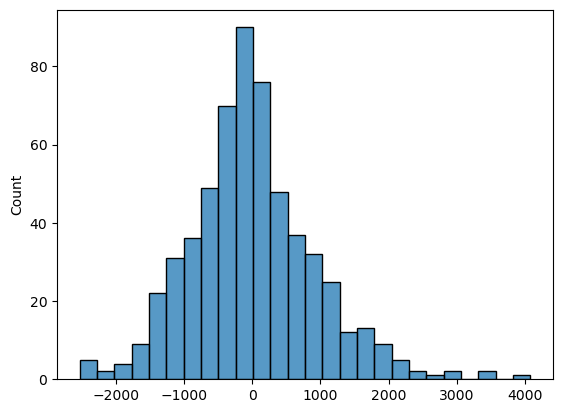

In [76]:
sns.histplot(residuals)
plt.show()

Residuals are following a Normal distribution with 'mean' at 0

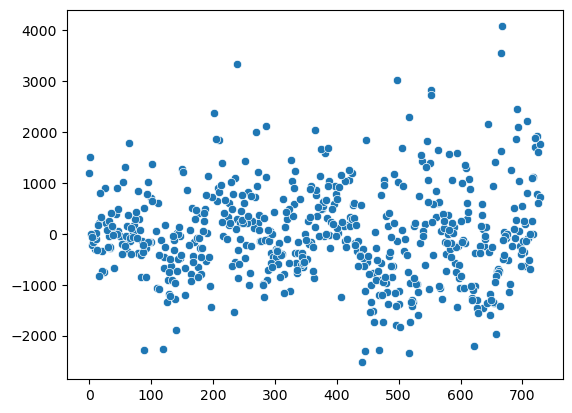

In [78]:
sns.scatterplot(residuals)
plt.show()

The Residuals look spread without any discernable patterns around 0. Hence, it is homoscedastic 

In [80]:
from sklearn.linear_model import LinearRegression

X_train = X_train[X_train_sm.columns[1:]]
X_test = X_test[X_test_sm.columns[1:]]
X_train.head()

,yr,holiday,workingday,temp,season_4,mnth_9,weathersit_3
367,1,0,1,-1.883741,0.0,0.0,0.0
648,1,0,1,-0.307420,1.0,0.0,0.0
44,0,0,1,-0.418039,0.0,0.0,0.0
705,1,0,1,-0.938872,1.0,0.0,0.0
379,1,0,0,-1.791557,0.0,0.0,0.0


In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [82]:
from sklearn.metrics import r2_score
r2_score(y_train_pred, y_train)

0.7187997690296029

In [83]:
model.coef_

array([ 1981.85768163,  -858.68231879,   168.09148268,  1224.31954776,
        1026.78651967,   564.3111082 , -2420.16438841])

In [84]:
model.intercept_

3165.2763475546017

In [85]:
model.feature_names_in_

array(['yr', 'holiday', 'workingday', 'temp', 'season_4', 'mnth_9',
       'weathersit_3'], dtype=object)

## Final Model
#### y = 3165.28 + 1981.86*`yr` - 858.68*`holiday` + 168.09*`workingday` + 1224.32*`temp` + 1026.79*`season_4` + 564.31*`mnth_9` - 2420.16*`weathersit_3`

## Prediction
We check the predictive capability of the model on test data

In [88]:
y_pred = model.predict(X_test)
r2_score(y_pred, y_test)

0.670163419517203

The r-squared on Test set look good. This very close to the R-square of training set (0.729), hence we can say that the model didn't overfit too.


In [90]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred, y_test))

981.7235970736464

RMSE of 981.7 means that, on an average, the residual error is 981.72 for predictions.